In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


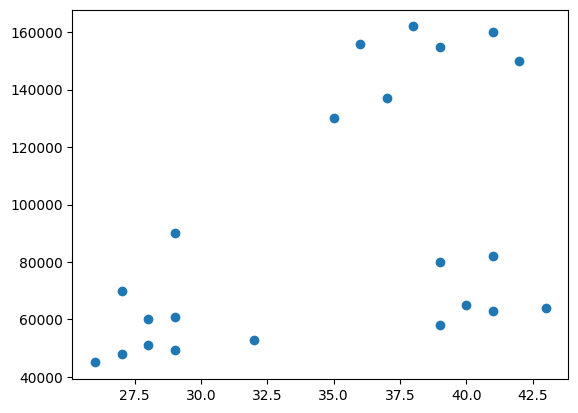

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df.Age,df['Income($)'])

In [4]:
#here from the scatter plot we can understand that there are 3 clusters

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['pred'] = y_predicted

In [9]:
df

,Name,Age,Income($),pred
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [10]:
df0 = df[df.pred == 0]
df1 = df[df.pred == 1]
df2 = df[df.pred == 2]

In [11]:
df0.head()

,Name,Age,Income($),pred
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


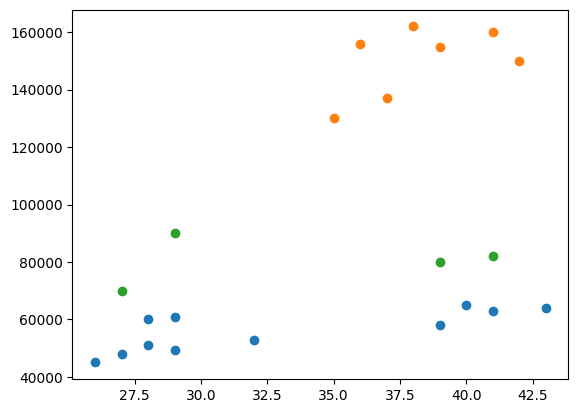

In [17]:
plt.scatter(df0.Age,df0['Income($)'])
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])

In [14]:
#this looks like the clustering went wrong because the y axis scale is in thousands

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [21]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [22]:
df 

,Name,Age,Income($),pred
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [23]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),pred
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [26]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [27]:
df['pred']=y_predicted
df

,Name,Age,Income($),pred
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [28]:
df0 = df[df.pred == 0]
df1 = df[df.pred == 1]
df2 = df[df.pred == 2]

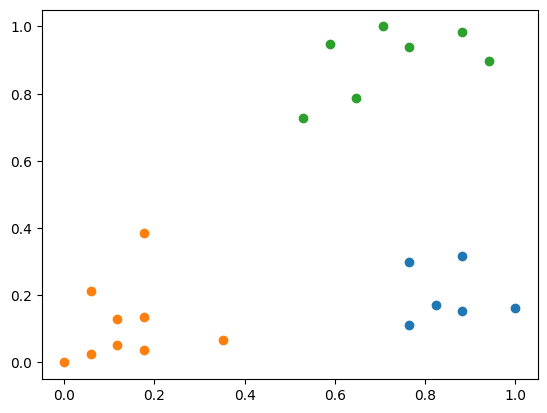

In [29]:
plt.scatter(df0.Age,df0['Income($)'])
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])

In [32]:
#to mark the centroid

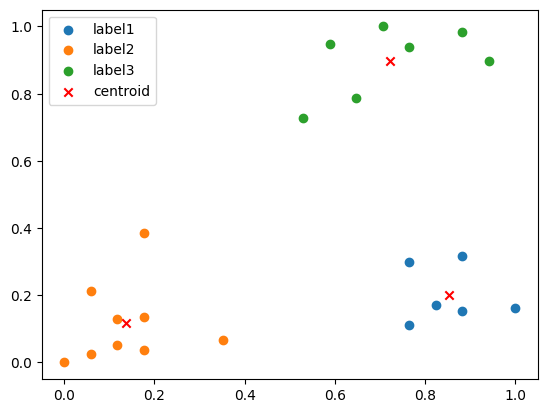

In [39]:
plt.scatter(df0.Age,df0['Income($)'],label='label1')
plt.scatter(df1.Age,df1['Income($)'],label='label2')
plt.scatter(df2.Age,df2['Income($)'],label='label3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='x',label='centroid')
plt.legend()

In [40]:
#Elbow plot

In [42]:
sse=[]
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [43]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.2203764169077067,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562]

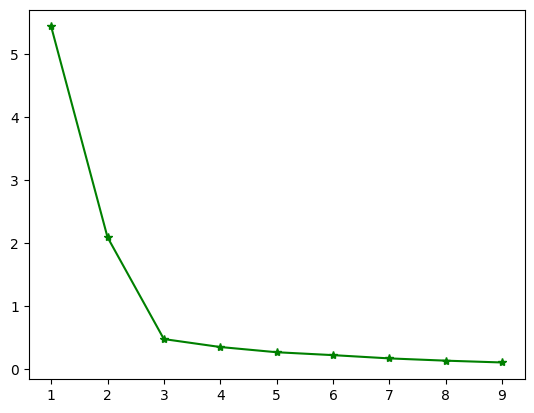

In [47]:
plt.plot(range(1,10),sse,marker='*',color='green')